# 常见损失函数

- torch提供的损失函数有：
    1. binary_cross_entropy
    2. binary_cross_entropy_with_logits
    3. poisson_nll_loss
    4. cosine_embedding_loss
    5. cross_entropy
    6. ctc_loss
    7. hinge_embedding_loss
    8. kl_div
    9. l1_loss
    10. mse_loss
    11. margin_ranking_loss
    12. multilabel_margin_loss
    13. multilabel_soft_margin_loss
    14. multi_margin_loss
    15. nll_loss
    16. smooth_l1_loss
    17. soft_margin_loss
    18. triplet_margin_loss

- 这些函数都有标准的数学公式，每个函数的使用方式都一样，下面直接列出公式：

### binary_cross_entropy函数

- 对数损失函数，没有做逻辑分布函数（sigmoid）运算

```python
    torch.nn.functional.binary_cross_entropy(input, target, weight=None, size_average=None, reduce=None, reduction='mean')
```

- 参数说明：
    - input：就是计算出来的y_
    - target：就是原来数据集中标签y
    - reduction: 损失的计算方式：
        - 均值
        - 求和

### binary_cross_entropy_with_logits函数

- 自动做逻辑分布函数（sigmoid函数）运算。

```python
    torch.nn.functional.binary_cross_entropy_with_logits(input, target, weight=None, size_average=None, reduce=None, reduction='mean', pos_weight=None)
```

- 这两个函数的本质是一样的，区别在于带后缀的with_logits函数对input数据多一个sigmoid操作。
    - sigmoid函数也称logits函数。
    - 主要用于二分类，比如典型的逻辑回归，例子见上面；

## poisson_nll_loss函数

- 泊松负对数似然损失（Poisson negative log likelihood loss）
- 泊松分布的函数为：
    - $P(x=k)= \dfrac{\lambda ^ {k}}{k!} e ^{- \lambda}$
        - $\lambda$表示单位时间内随机事件发生的次数；
        - 泊松分布的期望与方差都为$\lambda$；
        - $k!$是$k$的阶乘；
- 泊松分布与二项分布的关系：
    - 泊松分布是由二项分布推导而来，当二项分布的n很大，p很小的时候，泊松分布可以作为二项分布的近似，这时$\lambda=np$。

- 函数定义：

```python
    torch.nn.functional.poisson_nll_loss(input, target, log_input=True, full=False, size_average=None, eps=1e-08, reduce=None, reduction='mean')
```

- 参数：
    - log_input：逻辑值，用来设置是否对输入做exp指数运算：
        - False：$exp^{input} - target * input$
        - True：$input - target * log(input + eps)$ ：其中eps是无穷小量，用来防止input为0的情况。
    - full：是否添加Stirling近似项
        - $target * log(target) - target + 0.5 * log(2 * \pi * target)$
        
- 损失函数计算公式：
    - target数据服从泊松分布；
    - $loss = \sum \limits _{i} ( e^{\bar{y_i}} - y_i * \bar{y_i})$     

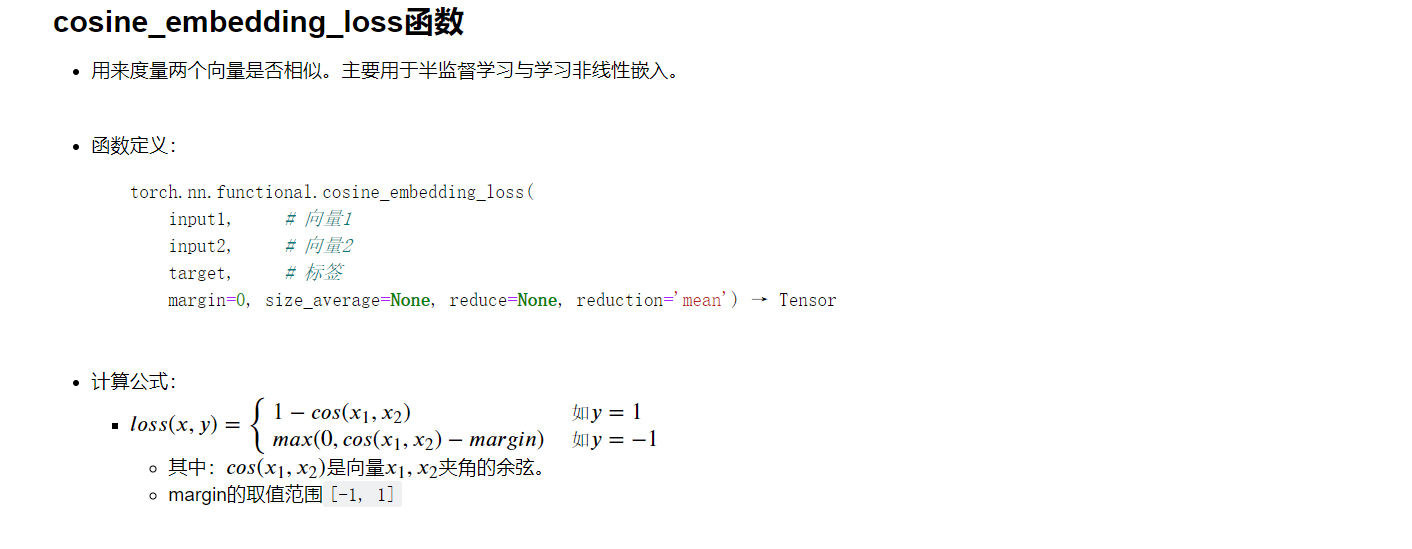

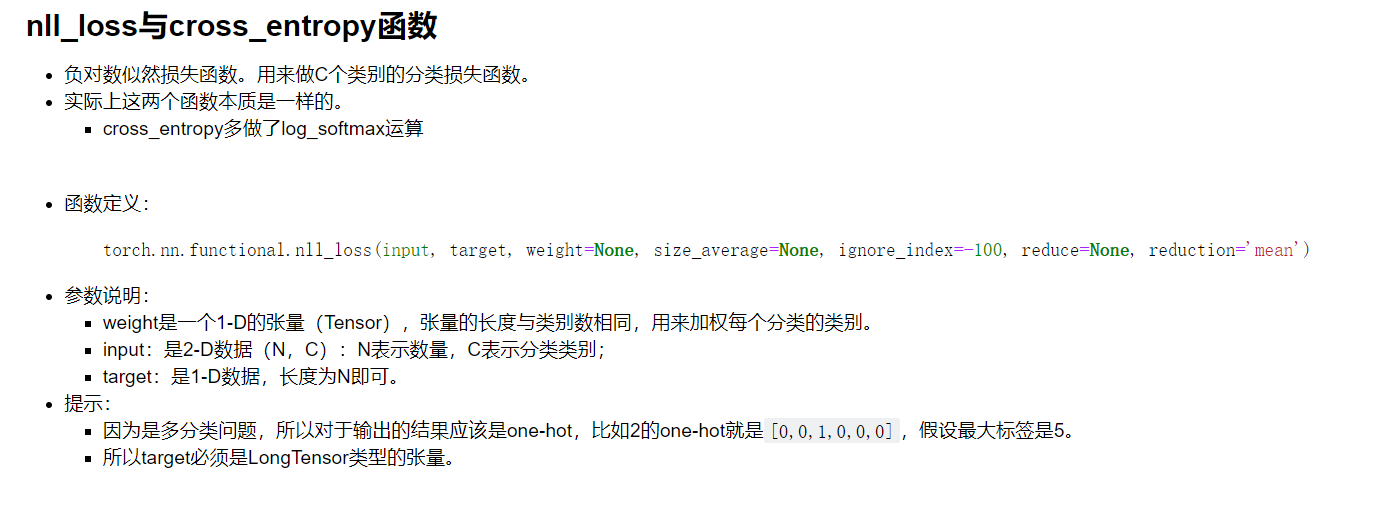

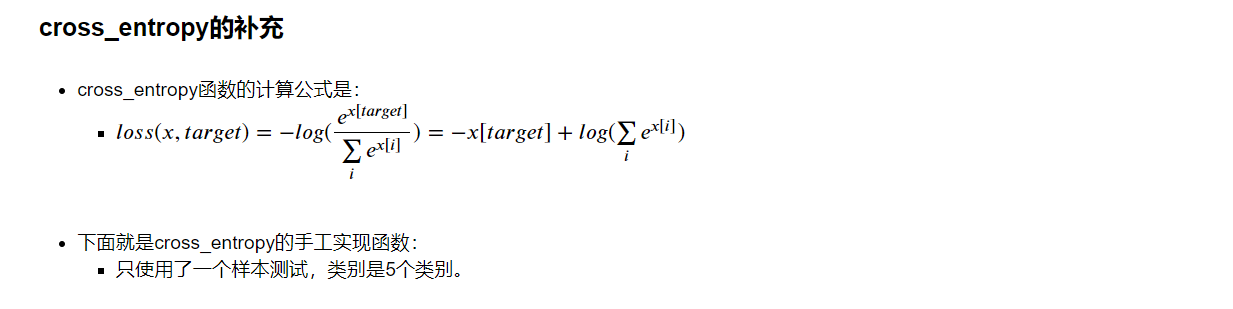

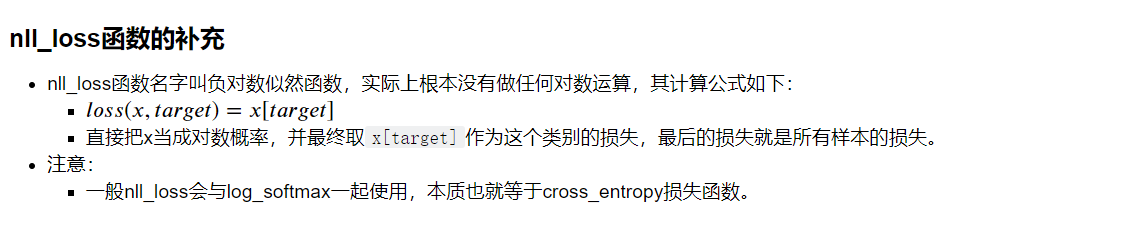

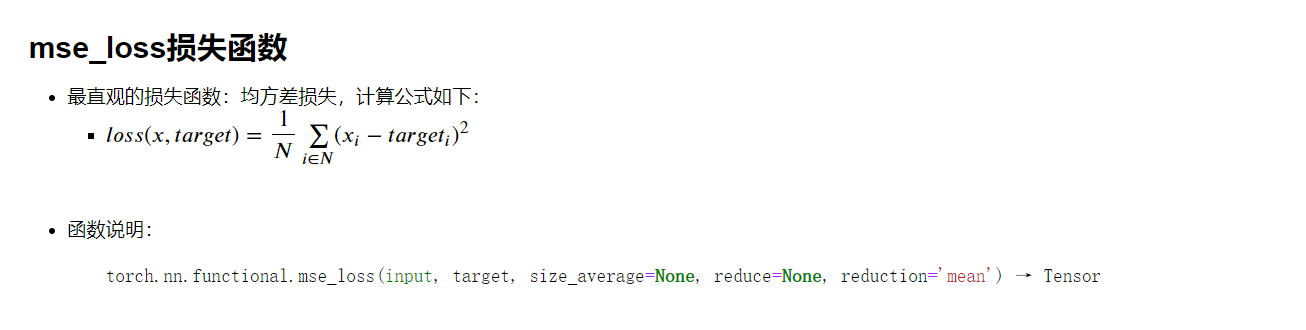

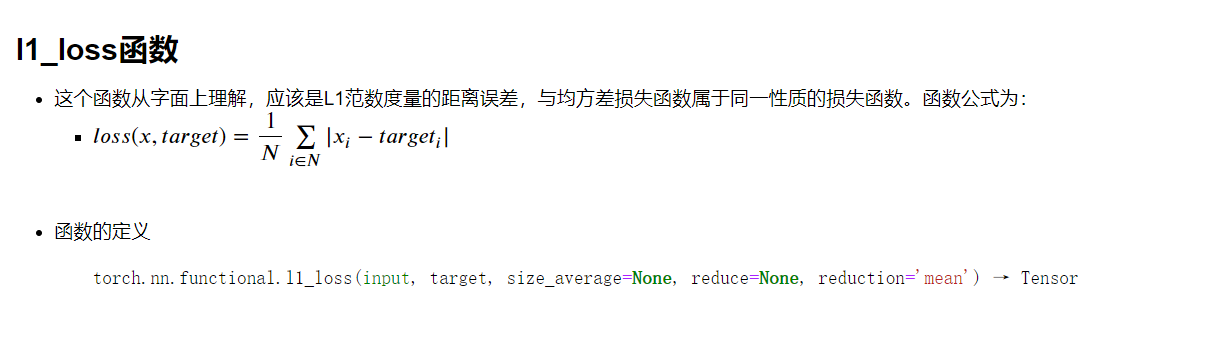


### kl_div函数

- The `Kullback-Leibler divergence`_ Loss.
    - 也称KL距离，一种不同于几何距离的度量方式，用来度量两个概率的差异的距离。

    - > &emsp;&emsp;相对熵（relative entropy），又被称为Kullback-Leibler散度（Kullback-Leibler divergence）或信息散度（information divergence），是两个概率分布（probability distribution）间差异的非对称性度量  。
    - > &emsp;&emsp;在在信息理论中，相对熵等价于两个概率分布的信息熵（Shannon entropy）的差值。
    - >&emsp;&emsp;相对熵是一些优化算法，例如最大期望算法（Expectation-Maximization algorithm, EM）的损失函数  。此时参与计算的一个概率分布为真实分布，另一个为理论（拟合）分布，相对熵表示使用理论分布拟合真实分布时产生的信息损耗 。

- 计算公式：
    - 信息熵：$H(x) = - \sum \limits _{i=1} ^ N p(x_i) log \ p(x_i)$
    - 散度：$D_{KL}(p | q) = \sum \limits _{i=1} ^ N p(x_i) (log \ p(x_i) - log \  q(x_i)) = \sum \limits _{i=1} ^ N p(x_i) log \dfrac{p(x_i)}{q(x_i)} $
    
    - Torch中封装的公式：
        - $loss(x, target) = target (log (target) - x)$：target=0的情况总体看成0，只考虑target为1的情况
        - $loss(x, target) = target (- x)$
        
- 函数定义

```python
    torch.nn.functional.kl_div(input, target, size_average=None, reduce=None, reduction='mean')
    
```

- 参数说明：
    - reduction参数：batchmean最后的均值使用batch_size，mean使用输出的个数；
        - 注意batch_size与输出总数是有差别的。如果是（N，1）维度，则没有差别。        

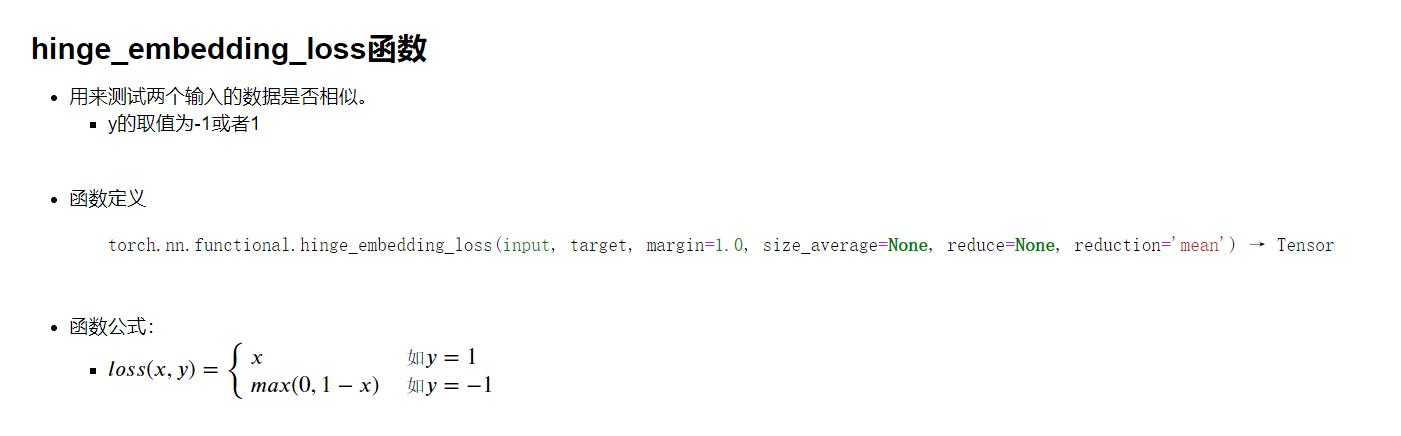